In [1]:
# making buffers ! - first use geometric, later base on transport distance?

# First, load packages
import pandas as pd
import os
import numpy as np
import shapely as sp

import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
# only for jupyter nb to show plots inline
# %matplotlib inline 


In [2]:
#change wd
os.chdir("/Users/anayahall/projects/grapevine")

gdf =  gpd.read_file("data/clean/clean_swis.shp")
# load census tract shapefile
CA = gpd.read_file("data/raw/tl_2018_06_tract/tl_2018_06_tract.shp")
# print(CA.crs)
# CA.plot()

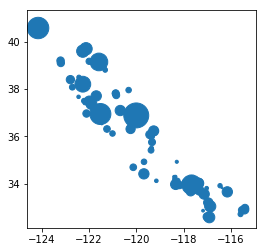

In [25]:
# try plotting by size of facility
# gdf.head()
# gdf.cap_m3
# gdf.plot(marker = 'o', markersize = gdf.cap_m3/1000)

In [207]:
print("swis gdf crs: ",gdf.crs)

gdf.head()
# CA.crs
# re-project
CA = CA.to_crs({'init': 'epsg:4326'})
# CA.plot

swis gdf crs:  {'init': 'epsg:4326'}


In [208]:
CA.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,137504,06037137504,1375.04,Census Tract 1375.04,G5020,S,3837562,0,+34.1480383,-118.5720594,"POLYGON ((-118.581186 34.143176, -118.580994 3..."
1,06,037,138000,06037138000,1380,Census Tract 1380,G5020,S,4472196,0,+34.1488008,-118.5910495,"POLYGON ((-118.60573 34.145854, -118.605611 34..."
2,06,037,139200,06037139200,1392,Census Tract 1392,G5020,S,1152031,0,+34.1756961,-118.5246447,"POLYGON ((-118.530824 34.180236, -118.529515 3..."
3,06,067,002300,06067002300,23,Census Tract 23,G5020,S,1213095,0,+38.5571708,-121.4938311,"POLYGON ((-121.502176 38.556434, -121.501838 3..."
4,06,067,002400,06067002400,24,Census Tract 24,G5020,S,3224718,0,+38.5448312,-121.4973382,"POLYGON ((-121.509697 38.540699, -121.509598 3..."


,index,SwisNo,Name,County,Location,Place,Latitude,Longitude,Category,Activity,...,AcceptedWa,Throughput,Throughp_1,Capacity,CapacityUn,Acreage,RemainingC,cap_m3,geometry,buffers
0,0,01-AA-0310,Tri-Cities Rec. and Disp. CD Chip/Grind,Alameda,7010 Auto Mall Pkwy.,Fremont,37.49078,-121.99040,Transfer/Processing,Small Vol CD Wood Debris ChipGrind Op,...,Wood waste,200.0,Tons/month,62369.0,Tons/year,90.0,None,8901.112415,POINT (-121.9904 37.49078),"POLYGON ((-121.4904 37.49078, -121.49280763666..."
1,1,27-AA-0090,Breien-Eade Compost Venture,Monterey,1 Pine Valley Road,San Ardo,36.12481,-121.00886,Composting,Composting Operation (Ag),...,"Agricultural,Manure",40000.0,Cu Yards/year,40000.0,Cu Yards/year,480.0,None,2548.516667,POINT (-121.00886 36.12481),"POLYGON ((-120.50886 36.12481, -120.5112676366..."
2,2,30-AB-0378,Golden Rain Foundation Composting Op.,Orange,24401 Moulton Parkway,Laguna Hills,33.60377,-117.72490,Composting,Composting Operation (Green Waste),...,Green Materials,20.0,Tons/day,10000.0,Cu Yards/year,3.0,None,637.129167,POINT (-117.7249 33.60377),"POLYGON ((-117.2249 33.60377, -117.22730763666..."
3,3,19-AR-5584,Dept. of Rec. & Parks Greenwaste Rec.,Los Angeles,5400 Griffith Park Dr,Los Angeles (City),34.11722,-118.27222,Composting,Chipping and Grinding Activity Fac./ Op.,...,Green Materials,50.0,Tons/day,19750.0,Tons/year,3.0,None,2818.659433,POINT (-118.27222 34.11722),"POLYGON ((-117.77222 34.11722, -117.7746276366..."
4,4,28-AA-0002,Clover Flat Resource Recovery Park,Napa,4380 Silverado Trail Road,Calistoga,38.58400,-122.53400,Composting,Composting Facility (Other),...,"Food Wastes,Green Materials",2500.0,Cubic Yards,2500.0,Cubic Yards,NaN,None,0.000000,POINT (-122.534 38.584),"POLYGON ((-122.034 38.584, -122.0364076366639 ..."


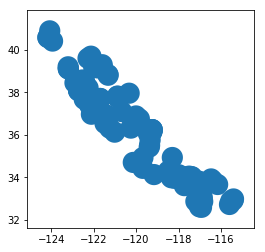

In [212]:
# add buffers
gdf['buffers'] = gdf.buffer(.5)
# one degree is about 85km 
# buf = gdf.buffer(250)

gdf.set_geometry('buffers').plot()
gdf.head()

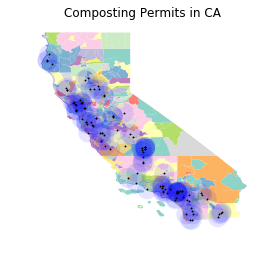

In [214]:
# # gdf.plot(s = 'buffers') 
f, ax = plt.subplots(1)
CA.plot(ax = ax, cmap='Set3', linewidth=0.1)
gdf.set_geometry('buffers').plot(ax = ax, color="blue", alpha="0.1")
gdf.set_geometry('geometry').plot(ax = ax, color="black", marker = '*', markersize= 1)
ax.axis('off')
ax.set_title('Composting Permits in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
plt.savefig("maps/CAwbuffers.png", dpi=300)

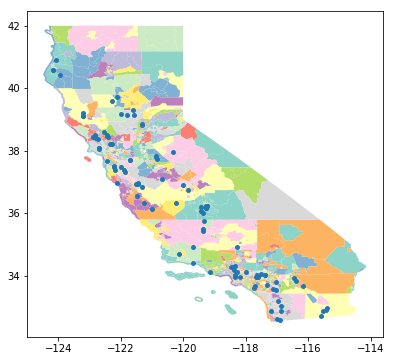

In [204]:
# attempt to nest plotting
gdf.plot(ax=CA.plot(cmap='Set3', figsize=(10, 6)), marker='o', markersize=15)
# ax.axis('off')
# ax.set_title('Composting Permits in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig("maps/map_export.png", dpi=300)

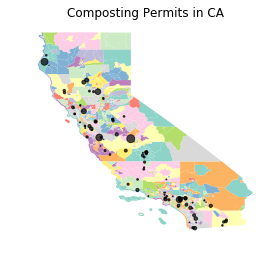

In [31]:
# better plot, with title
f, ax = plt.subplots(1)
CA.plot(ax = ax, cmap='Set3', figsize = (10,6), linewidth=0.1)
gdf.plot(ax = ax, markersize = gdf.cap_m3/10000, marker = 'o', color = 'black', alpha=.7)
ax.axis('off')
ax.set_title('Composting Permits in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
plt.savefig("maps/FacilitiesbyCapacity.png", dpi=300)